# PEC 1 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2023/2024

VICENTE VILLAGRASA, DIEGO

### EMAIL ALUMNO:

diegovicentevillagrasa@gmail.com

#### Uso de Datasets en la PEC1

En esta práctica, nos enfocaremos en utilizar los datasets que están específicamente incluidos en Scikit-learn. Es importante que todos los datasets que utilices provengan de la sección de **Toy Datasets** que puedes encontrar en la documentación oficial de Scikit-learn.

Puedes acceder a esta sección a través del siguiente enlace: [Toy Datasets en Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

Estos datasets han sido seleccionados por su utilidad y simplicidad para fines educativos, proporcionando una excelente oportunidad para aprender y practicar diversas técnicas de aprendizaje automático. Algunos ejemplos populares de estos datasets incluyen el *Iris dataset*, *Digits dataset*, *Wine dataset*, entre otros.

Asegúrate de explorar y utilizar estos datasets para tus ejercila PEC1.ráctica.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

### Pregunta 1

##### Cargar un set de datos y división en distintos porcentajes de train/test


- Descarga un dataset de los reseñados arriba
- Describe las dimensiones del Dataset
- Define si es para hacer Regresión y Clasificación y por qué
- Divide los datos en conjuntos de TRAIN y TEST (en diferentes % de test). Pruebe diferentes parámetros del método train_test_split de Scikit-Learn
- Evalua las características, dimensiones y contenido de los conjuntos de datos resultantes al dividirlos

#### Descarga un dataset de los reseñados arriba

In [2]:
wine = datasets.load_wine()

#### Describe las dimensiones del Dataset

In [3]:
wine.data.shape

(178, 13)

Las dimensiones del dataset $wine$ es de 178 filas y 13 columnas

#### Define si es para hacer Regresión y Clasificación y por qué

In [4]:
# Se visualiza el contenido del dataset
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Tras ver el contenido del dataset $wine$ se puede afirmar que se puede realizar tanto regresión como clasificación. Esto se debe a que la tabla contiene un dato de clasificación de que tipo es cada vino (tipo 0, tipo 1 y tipo 2), y contiene muchos datos con los que se puede predecir alguna característica del vino. 

Por tanto, se podrá hacer regresión y clasificación sobre el dataset $wine$

In [5]:
wine.target # Clases de los vinos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

#### Divide los datos en conjuntos de TRAIN y TEST (en diferentes % de test). Pruebe diferentes parámetros del método train_test_split de Scikit-Learn

El método $train$_ $test$_ $split$ tiene los siguientes parámetros:

- test_size: Se indica de 0 a 1 la proporción del dataset que corresponderá al conjunto de datos de test. Lo que quede restante será el conjunto de datos de train. Si no se especifica este parámetro, este valdrá 0.25 de manera automática.

- train_size: Se indica de 0 a 1 la proporción del dataset que corresponderá al conjunto de datos de train. Lo que quede restante será el conjunto de datos de test. Si no se especifica este parámetro, el tamaño de train se adaptará a los datos restantes que deje test. 

- random_state: Con este parámetro se podrá elegir la semilla aleatoria que controla el proceso de división de datos en train y test. Si se fija una en concreto, siempre se obtendrá la misma partición de datos. 

- shuffle: Si se señala este parámetro como True, los datos se mezclarán antes de realizar la división en train y test. Si no, los datos se dejarán en la posición original.

- stratify: Si señala este parámetro como True, el conjunto de datos se dividirá conservando las proporciones originales de la base de datos, es decir, si tenemos una base de datos de manzanas y peras, y estas se dividen en una proporción de 40% / 60%, se conservará dicha proporción en las particiones de test y train sin importar el tamaño de estas.

Ahora conociendo la función a detalle, se va a proceder a crear distintas particiones con parámetros diferentes.

In [6]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(wine.data, wine.target)
# IGUAL A X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=0)

In [14]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(wine.data, wine.target, test_size=0.5, shuffle = False)

In [18]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(wine.data, wine.target, train_size=0.5, shuffle = True, random_state= 58)

In [9]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(wine.data, wine.target, test_size=0.3, stratify = wine.target)

#### Evalua las características, dimensiones y contenido de los conjuntos de datos resultantes al dividirlos

##### Características

Todos los splits tienen las 13 columnas originales del dataset wine. Esto nunca cambiará, ya que es necesario que todos los splits tengan los mismos $features$ para el correcto funcionamiento del proceso de entrenamiento de modelos.

##### Dimensiones y contenido

En este aspecto si que comienzan a variar los splits. Algunas observaciones son:

- Train test 1: Este es un train test sin cambiar parámetros, por tanto, el train tendrá un tamaño del 75% de la base de datos, mientras que el test el 25% restante. Se realiza un mezclado de datos, ya que el shuffle de manera predeterminada está en True. No se mantiene la proporción de tipos de datos ya que stratify está desactivado de manera predeterminada.

- Train test 2: La diferencia con el caso anterior es que ahora el train y test tienen la misma cantidad de datos, 50% y 50% de la base de datos original. Aparte, se ha desactivado el parámetro shuffle, lo que significa que los datos no se mezclarán tras antes de hacer la separación de datos.

- Train test 3: Este train test es idéntico al anterior, solo que se ha activado de nuevo el shuffle. Esto permite observar lo que provoca este parámetro sobre los splits. Aparte, se ha fijado como semilla aleatoria 58, usando el parámetro $random$_ $state$, lo que permite siempre obtener el mismo resultado con dicha semilla y parámetros.

- Train test 4: Por último, se ha hecho un split donde el tamaño del test es de 30%, y el de train de 70%. Aparte, se ha activado el parámetro stratify. Es decir, la proporción de los tres tipos de vino será igual en el test y en el train.

A continuación se muestran las primeras filas de cada x_train, para poder observar las diferencias de manera visual:

In [17]:
X_train_df1 = pd.DataFrame(X_train_1, columns=wine.feature_names)
X_train_df1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0
1,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0
2,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
3,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0
4,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0


In [15]:
X_train_df2 = pd.DataFrame(X_train_2, columns=wine.feature_names)
X_train_df2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [19]:
X_train_df3 = pd.DataFrame(X_train_3, columns=wine.feature_names)
X_train_df3.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
1,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
2,13.32,3.24,2.38,21.5,92.0,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650.0
3,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0
4,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0


In [20]:
X_train_df4 = pd.DataFrame(X_train_4, columns=wine.feature_names)
X_train_df4.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
3,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0
4,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0


### Pregunta 2

##### Entrenar un modelo de clasificación KNN con un dataset de scikit learn y comparar resultados de predicción entre los conjuntos de train y de test

- Carga un dataset proporcionado por Scikit-Learn
- Prepara los datos para el entrenamiento del modelo, realizando cualquier paso de pre-procesamiento necesario
- Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba. Ajusta los parámetros adecuadamente para una división equitativa
- Instancia un modelo KNN y entrena este modelo con el conjunto de entrenamiento
- Evalúa la precisión del modelo tanto en el conjunto de entrenamiento como en el de prueba
- Utiliza una métrica de evaluación adecuada para comparar el rendimiento en ambos conjuntos
- Analiza los resultados obtenidos (p.e. dibujar y plotear boundary decisions...) y extraer conclusiones pertinentes, especialmente en caso de encontrar diferencias significativas en el rendimiento entre los conjuntos de entrenamiento y prueba

#### Carga un dataset proporcionado por Scikit-Learn

Se va a cargar el dataset $breast$_ $cancer$ proporcionado por Scikit-Learn. Esta base de datos contiene diferentes análiticas de pacientes que tienen cáncer de mama. Algunas de estas muestras son benignas, y otras malignas, por tanto se podrá clasificar en 0 y 1. Es una base de datos adecuada para entrenar modelos de clasificación.

In [2]:
# Se carga la base de datos
bc = datasets.load_breast_cancer()

# Se visualizan las primeras filas
bc_df = pd.DataFrame(bc.data, columns=bc.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
bc.target[:25] # Se visualizan los primeros 25 tipos, viendo que existen 0 y 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0])

#### Prepara los datos para el entrenamiento del modelo, realizando cualquier paso de pre-procesamiento necesario

In [4]:
# Separación de la variable objetivo
y = bc.target

In [5]:
# Comprobar si existen nulos para rellenarlos
bc_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Se puede observar en la visualización del dataset que los datos varían mucho entre columnas, por tanto, se va a normalizar el dataset para que esta diferencia no sea tan alta.

Para ello, se va a utilizar el $StandardScaler$ del paquete scikit learn. Primero habrá que crear el objeto, y posteriormente normalizar los datos:

In [6]:
from sklearn.preprocessing import StandardScaler

normaliser = StandardScaler() # Crear normalizador
bc_norm = normaliser.fit_transform(bc.data) # Normalizar datos

Mostrando las primeras filas de la base de datos original y la normalizada, se puede observar facilmente la diferencia:

In [7]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
bc_df_norm = pd.DataFrame(bc_norm, columns=bc.feature_names)
bc_df_norm.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


#### Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba. Ajusta los parámetros adecuadamente para una división equitativa

Para dividir de forma equitativa los datos entre train y test, se van a utilizar dos parámetros diferentes. Primero se va a fijar el test_size con un tamaño de 50%, lo que dejará al train con el 50% restante. También se va activar el $stratify$, que asegura que haya la misma proporción de tipos en train y test. Para ello, hay que pasarle al parámetro los tipos de la base de datos (target).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(bc.data, y, test_size = 0.5, stratify = y)

#### Instancia un modelo KNN y entrena este modelo con el conjunto de entrenamiento

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=5) # Instanciar el modelo KNN
knn.fit(X_train, y_train) # Entrenar el modelo

KNeighborsClassifier()

#### Evalúa la precisión del modelo tanto en el conjunto de entrenamiento como en el de prueba

Para evaluar la precision del modelo se va a utilizar el método $score$, aplicable en el modelo KNN entrenado anteriormente.
El resultado es el siguiente:

In [14]:
# Precisión del conjunto de entrenamiento
knn.score(X_train, y_train)

0.9330985915492958

In [15]:
# Precisión del conjunto de prueba
knn.score(X_test, y_test)

0.9438596491228071

Los resultados indican que en el conjunto de $train$, el modelo ha acertado el 94.71% de veces. Es un número de aciertos muy alto, aunque es totalmente lógico, ya que son los datos con los que se ha entrenado el modelo.

Una manera de evaluar la precisión de manera más realista, es ver el $score$ de los datos de train, ya que aquí el modelo se está poniendo a prueba con datos que no ha visto. En este caso, se ha obtenido un porcentaje del 92.28%. Es un porcentaje muy alto de aciertos, aunque en un ámbito como en el de determinar si un cáncer en benigno o maligno, se tiene que velar por obtener el porcentaje más alto posible, por tanto tener la precisión más alta.

Otra forma de visualizar los aciertos y los errores del modelo es con la matriz de confusión. Esta matriz muestra cuantas veces se acierta cada tipo, y también cada vez que se falla, mostrando el tipo con el que ha fallado.

Para crear una matriz de confusión se va a seguir el siguiente procedimiento:

In [16]:
from sklearn.metrics import confusion_matrix # Se importa el paquete

y_pred = knn.predict(X_test) # Se crea un conjunto de datos formado por la predicción resultante del conjunto X_test con el modelo KNN

confusion_matrix = confusion_matrix(y_test, y_pred) # Se rea un objeto de la clase confusion_matrix

print(confusion_matrix) # Se visualiza la matriz de confusión

[[ 94  12]
 [  4 175]]


En la primera columna se observa el número de aciertos y fallos del tipo 0 de la base de datos, teniendo 90 aciertos, y 6 fallos. Estos 6 fallos significan que el modelo predijo tipo 1, cuando realmente era tipo 0. En la siguiente columna se observa que se ha fallado 16 veces, y se han acertado 173. Es decir, el modelo predijo 16 veces tipo 0 cuando era tipo 1.

Por último, se va a calcular la precisión del modelo, pero en este caso pasándole toda el dataset al modelo KNN para que este prediga los resultados. Se va a hacer de la siguiente forma:

In [20]:
from sklearn.metrics import accuracy_score

salida_pred = knn.predict(bc.data)
print(accuracy_score(salida_pred,y))

0.9384885764499121


El resultado es muy parecido a los demás, entre el 92 y el 94% aproximadamente.

#### Utiliza una métrica de evaluación adecuada para comparar el rendimiento en ambos conjuntos

Para evaluar el rendimiendo de cada conjunto, se va a calcular la precisión, la sensibilidad, y el f1 score de cada conjunto respecto a los valores predichos por el modelo de cada conjunto.

La precisión indica la proporción de muestras que el modelo predijo correctamente, la sensibilidad es la proporción de muestras POSITIVAS que el modelo predijo correctamente (es decir, verdaderos positivos / (verdaderos positivos + falsos positivos)), y el F1 score combina las métricas de precisión y sensibilidad para poder visualizar rápidamente el desempeño de un modelo.

Para calcular estas métricas, el primer paso necesario es calcular las predicciones del modelo usando el método $predict$, tanto para el conjunto de test, como el de train.

In [18]:
y_pred_test = knn.predict(X_test) 
y_pred_train = knn.predict(X_train)

Tras esto, se calculará las métricas de precisión, sensibilidad y f1-score con los métodos $precision$_ $score$, $recall$_ $score$ y $f1$_ $score$ respectivamente:

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Conjunto de train
precision_train = precision_score(y_train, y_pred_train, average='macro')
sensibilidad_train = recall_score(y_train, y_pred_train, average='macro')
f1_train = f1_score(y_train, y_pred_train, average='macro')

# Conjunto de test
precision_test = precision_score(y_test, y_pred_test, average='macro')
sensibilidad_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

Por último se visualizarán los resultados:

In [22]:
print("Precision de train =", precision_train)
print("Sensibilidad de train =", sensibilidad_train)
print("F1 score de train =", f1_train)

Precision de train = 0.9325596494075638
Sensibilidad de train = 0.9237333050667798
F1 score de train = 0.9277904907195526


In [23]:
print("Precision de test =", precision_test)
print("Sensibilidad de test =", sensibilidad_test)
print("F1 score de test =", f1_test)

Precision de test = 0.9475062752373676
Sensibilidad de test = 0.9322230420575525
F1 score de test = 0.9389263902282223


#### Analiza los resultados obtenidos (p.e. dibujar y plotear boundary decisions...) y extraer conclusiones pertinentes, especialmente en caso de encontrar diferencias significativas en el rendimiento entre los conjuntos de entrenamiento y prueba

Como se puede observar por los resultados de score, precisión, sensibilidad y f1-score, ambos modelos tienen un rendimiento muy parecido. A continuación se va a comparar resultado a resultado para llegar a una conclusión:

- Score: El conjunto de train consiguió una puntuación de 0.933, y test de 0.943, por lo que el conjunto de test es más efectivo, pero no hay una gran diferencia.

- Precisión: El conjunto de train consiguió una puntuación de 0.932, y test de 0.947

- Sensibilidad: El conjunto de train consiguió una puntuación de 0.923, y test de 0.932

- F1-Score: El conjunto de train consiguió una puntuación de 0.927, y test de 0.938

Como se puede observar, la dinámica es la misma en todas las métricas, el conjunto de test obtiene mejores resultados, pero no muy notables, estando alrededor de 0.01 por encima del conjunto de train.

### Pregunta 3

##### Evaluación del Impacto de Parámetros en un Modelo KNN con Scikit-Learn

- Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para un modelo de clasificación KNN
- Realiza cualquier pre-procesamiento necesario en el dataset
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split.
- Elige al menos dos parámetros importantes del modelo KNN para evaluar. Algunas sugerencias pueden ser el número de vecinos (n_neighbors) y el tipo de ponderación de los vecinos (weights)
- Para cada parámetro, entrena múltiples modelos variando los valores de dicho parámetro mientras mantienes constantes los otros
- Utiliza una métrica de rendimiento adecuada, como la precisión, para evaluar el impacto de los distintos valores de cada parámetro en el rendimiento del modelo.
- Realiza este proceso para cada parámetro de forma independiente y registra los resultados
- Determina qué combinaciones de parámetros ofrecen los mejores resultados y saca conclusiones sobre la importancia de cada parámetro evaluado

#### Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para un modelo de clasificación KNN

Para este ejercicio se ha elegido el dataset $iris$, que contiene datos de longitud y ancho de sépalo, longitud y longitud y alto de pétalo, con lo que se pueden clasificar tres tipos de flores, setosa, versicolor y virginica.

In [55]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#### Realiza cualquier pre-procesamiento necesario en el dataset

Primero se van a visualizar las primeras filas del dataset, para decidir si es necesario normalizar o no:

In [56]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Los datos numéricos no se alejan mucho unos de otros, así que no se aplicará normalización.

Ahora se va a comprobar si existen valores nulos en el dataset. En caso de que haya, ser rellenarán dichos nulos.

In [57]:
# Comprobar si existen nulos para rellenarlos
print(iris_df.isna().sum(), "\n")
print("No hay valores nulos")

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64 

No hay valores nulos


Por último, se van a extaer los datos y los targets del dataset:

In [58]:
target = iris.target
data = iris.data

#### Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split.


Para dividir el dataset se va a usar el método $train$ _$test$ _$split$ con los parámetros por defecto:

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, target)


#### Elige al menos dos parámetros importantes del modelo KNN para evaluar. Algunas sugerencias pueden ser el número de vecinos (n_neighbors) y el tipo de ponderación de los vecinos (weights)

#### Para cada parámetro, entrena múltiples modelos variando los valores de dicho parámetro mientras mantienes constantes los otros

#### Utiliza una métrica de rendimiento adecuada, como la precisión, para evaluar el impacto de los distintos valores de cada parámetro en el rendimiento del modelo.

#### Realiza este proceso para cada parámetro de forma independiente y registra los resultados

Se van a utilizar los parámetros de KNN $n$_ $neighbors$ y $weights$. 

$n$_ $neighbors$ representa el número de vecinos más cercanos necesarios para clasificar un dato a un tipo. Cuanto más alto sea el número de $n$_ $neighbors$, se necesitarán más vecinos para poder clasificar un tipo, lo que puede provocar que el modelo no sea tan preciso, por ello hay que encontrar un punto medio.

$weights$ representa el tipo de ponderación de los vecinos. Hay dos tipos, $uniform$ y $distance$. En $uniform$, todos los vecinos se ponderan por igual, mientras que en $distance$, los vecinos más cercanos tienen mayor ponderación a los vecinos más lejanos.

Para evaluar el efecto que tienen ambos parámetros sobre el modelo KNN se va a crear una lista donde se va a ir almacenando los $scores$ obtenidos de los modelos con los diferentes parámetros de $n$_ $neighbors$ y $weights$:

In [72]:
neighbors_scores = [] # lista de puntuación de n_neighbors

for n_neighbors in range(1, 11): # bucle para ir de 1 vecino a 10 vecinos
    knn = KNeighborsClassifier(n_neighbors=n_neighbors) # Creación del modelo con el numero de vecinos puesto por el bucle
    knn.fit(X_train, y_train) # Entrenamiento del modelo
    neighbors_scores.append(knn.score(X_test, y_test)) # Obtención del score del modelo

In [73]:
weight_scores = [] # lista de puntuación de weights

for weights in ['uniform', 'distance']: # bucle para probar las dos opciones que da el parámetro weights
    knn = KNeighborsClassifier(n_neighbors=8, weights=weights) # Creación del modelo 
    knn.fit(X_train, y_train) # Entrenamiento del modelo
    weight_scores.append(knn.score(X_test, y_test)) # Obtención del score del modelo

A continuación se va a visualizar los $scores$ obtenidos:

In [62]:
# Neighbors de 1 a 10 vecinos, con los demás parámetros predeterminados 
neighbors_scores

[0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315]

In [74]:
# Weigths uniform y distance, con los demás parámetros predeterminados y numero de vecinos a 8
weight_scores

[0.9736842105263158, 0.9473684210526315]

Por último, se va a visualizar gráficamente estos resultados utilizando el paquete $matplotlib.pyplot$:

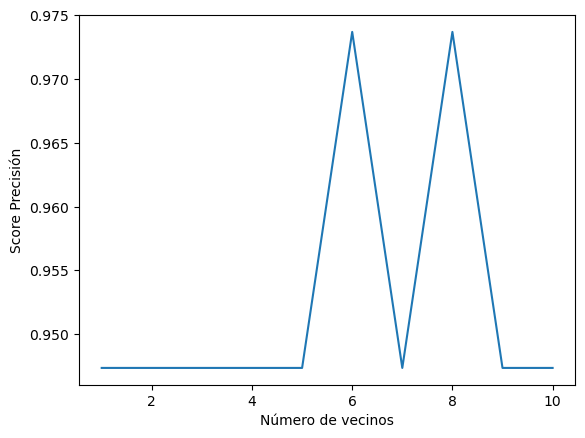

In [64]:
# Resultados neighbors
plt.plot(range(1, 11), neighbors_scores)
plt.xlabel('Número de vecinos')
plt.ylabel('Score Precisión')
plt.show()

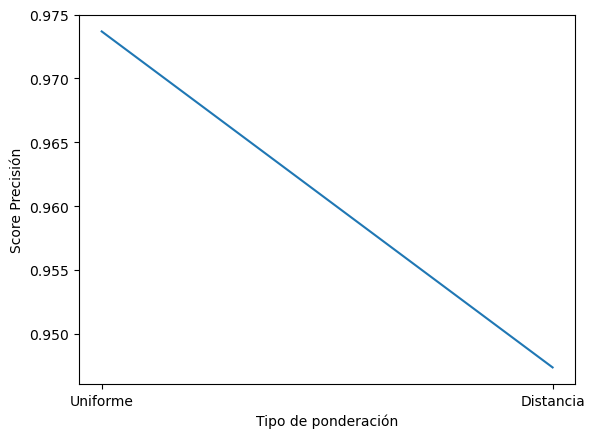

In [75]:
# Resultados weights
plt.plot(['Uniforme', 'Distancia'], weight_scores)
plt.xlabel('Tipo de ponderación')
plt.ylabel('Score Precisión')
plt.show()

#### Determina qué combinaciones de parámetros ofrecen los mejores resultados y saca conclusiones sobre la importancia de cada parámetro evaluado

##### n_neighbors: 
El resultado es idéntico para los números de vecinos 1,2,3,4,5,7,9,10 = 0.947. Los números de vecinos 6 y 8 dan 0.973, por lo que lo óptimo para este dataset y modelo de predicción es utilizar 6 u 8 como número de vecinos.

##### weights: 
En $uniform$ se ha obtenido una puntuación de 0.973, y en $distance$ 0.947. Por tanto, lo óptimo será utilizar el parámetro $weights$ con la opción $uniform$.

Estos dos parámetros afectan notablemente al rendimiento del modelo, debido a que afectan directamente al funcionamiento del mismo, por lo que es muy importante realizar pruebas para encontrar la mejor combinación para cada caso.

### Pregunta 4

##### Evaluación de la Influencia de la Normalización en Modelos de Regresión con Scikit-Learn

- Elige y carga un dataset de regresión proporcionado por Scikit-Learn
- Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba
- Elige un modelo de regresión para la evaluación. Por ejemplo, puedes elegir la Regresión Lineal o la Regresión de Ridge
- Estos modelos son representativos y permiten evaluar cómo la normalización influye en diferentes enfoques de regresión (Influye más con Ridge)
- Selecciona al menos dos métodos de normalización, como la normalización Min-Max y la estandarización StandardScaler
- Aplica cada método de normalización por separado al conjunto de entrenamiento y ajusta el conjunto de prueba de manera correspondiente
- Para cada versión normalizada del conjunto de entrenamiento, entrena ambos modelos de regresión seleccionados
- Mantén constantes los demás parámetros del modelo para cada tipo de normalización para asegurar una comparación justa
- Utiliza métricas de rendimiento adecuadas para la regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²), para evaluar cada modelo en el conjunto de prueba
- Compara el rendimiento de los modelos con diferentes métodos de normalización
- Basándote en los resultados, concluye sobre la importancia de la normalización en los modelos de regresión seleccionados y su influencia en la precisión del modelo

#### Elige y carga un dataset de regresión proporcionado por Scikit-Learn

Para este ejercicio se va a usar el dataset $diabetes$ proporcionado por scikit learn. Este dataset contiene datos de información médica sobre pacientes con diabetes, y es muy adecuado para crear modelos de regresión sobre el debido a que estos datos sirven para predecir el nivel de glucosa del paciente con diabetes.

Lo primero que se hará es cargar el dataset, visualizarlo, y separar en diferentes variables los datos y el target:

In [2]:
diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
data_diabetes = diabetes.data
target_diabetes = diabetes.target

#### Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data_diabetes, target_diabetes)

#### Elige un modelo de regresión para la evaluación. Por ejemplo, puedes elegir la Regresión Lineal o la Regresión de Ridge

Para este caso, se va a utilizar la regresión lineal. Para ello, se tendrá que importar el paquete $LinearRegression$ de $sklearn.linear$_ $model$, para posteriormente crear el modelo, y entrenarlo.

In [5]:
from sklearn.linear_model import LinearRegression # Importación de paquete
lr = LinearRegression() # Creación del objeto 
lr.fit(X_train, y_train) # Entrenamiento del modelo

LinearRegression()

#### Selecciona al menos dos métodos de normalización, como la normalización Min-Max y la estandarización StandardScaler

El $Min$-$Max Scaler$ realiza el escalado dependiendo de un rango. Primero calcula el valor máximo y mínimo de cada $feature$ del conjunto de datos, y luego escala cada valor dividiendo por la diferencia entre el valor máximo y mínimo.

En cambio, el $Standard Scaler$ primero calcula la media y la varianza de cada $feature$ del conjunto de datos. Posteriormente, escala cada valor restando la media y dividiendo por la raiz cuadrada de la varianza (desviación estándar).

Se van a probar ambos para ver como afectan al entrenamiento de modelos de regresión lineal:

In [6]:
# Se importan los paquetes necesarios
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

# Se crean los objetos que contienen los normalizadores
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

#### Aplica cada método de normalización por separado al conjunto de entrenamiento y ajusta el conjunto de prueba de manera correspondiente

In [9]:
# Ejecución del normalizador Min Max en X_train y X_test
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.fit_transform(X_test)

In [10]:
# # Ejecución del normalizador Standard Scaler en X_train y X_test
X_train_standard_scaler = standard_scaler.fit_transform(X_train)
X_test_standard_scaler = standard_scaler.fit_transform(X_test)

#### Para cada versión normalizada del conjunto de entrenamiento, entrena ambos modelos de regresión seleccionados

In [11]:
lr_minmax = LinearRegression()
lr_minmax.fit(X_train_min_max, y_train)

lr_standard = LinearRegression()
lr_standard.fit(X_train_standard_scaler, y_train)

LinearRegression()

#### Utiliza métricas de rendimiento adecuadas para la regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²), para evaluar cada modelo en el conjunto de prueba

Para comprobar el rendimiento del modelo se va a utilizar el error cuadrático medio, que mide la distancia al cuadrado entre los valores reales y los predichos, y el coeficiende de determinación, que mide la proporción de la varianza de los valores reales que se explica por los valores predichos.

Es decir, el rendimiento será mejor a menor MSE que tenga, y a mayor R².

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lr.predict(X_test)
y_pred_minmax = lr_minmax.predict(X_test_min_max)
y_pred_standard = lr_standard.predict(X_test_standard_scaler)

mse = np.sqrt(mean_squared_error(y_test, y_pred))
mse_minmax = np.sqrt(mean_squared_error(y_test, y_pred_minmax))
mse_standard = np.sqrt(mean_squared_error(y_test, y_pred_standard))

r2 = r2_score(y_test, y_pred)
r2_minmax = r2_score(y_test, y_pred_minmax)
r2_standard = r2_score(y_test, y_pred_standard)

In [21]:
print("MSE SIN NORMALIZAR = ",mse)
print("R2 SIN NORMALIZAR = ",r2, "\n")

print("MSE MIN_MAX = ",mse_minmax)
print("R2 MIN_MAX = ",r2_minmax, "\n")

print("MSE STANDARD SCALER = ",mse_standard)
print("R2 STANDARD SCALER = ",r2_standard)

MSE SIN NORMALIZAR =  56.05254484687195
R2 SIN NORMALIZAR =  0.4253104187454001 

MSE MIN_MAX =  57.80367497764876
R2 MIN_MAX =  0.38884192421375685 

MSE STANDARD SCALER =  54.368228589960246
R2 STANDARD SCALER =  0.45932906908360405


#### Compara el rendimiento de los modelos con diferentes métodos de normalización

Teniendo en cuenta los resultados obtenidos en el output antenior, el modelo que los ha obtenido mejores es el que está normalizado usando el $Standard Scaler$, ya que ha obtenido un MSE 3.43 puntos más bajo, y un R² 0.07 más alto. 

Esto indicaría que el modelo normalizado con $Standard Scaler$ es capaz de realizar una regresión lineal mejor que el modelo normalizado con el escalador $MinMax$.

#### Basándote en los resultados, concluye sobre la importancia de la normalización en los modelos de regresión seleccionados y su influencia en la precisión del modelo

Como se puede ver por los resultados, se ha obtenido un mejor resultando usando el normalizador $Standard$, que usando los datos originales. 

Esto indica la importancia de la normalización, ya que este proceso puede permitir mejorar el rendimiento de los modelos de regresión, ya que hace que los datos sean más homogéneos y los valores atípicos no afecten tanto al modelo, ya que este tipo de valores pueden reducir el rendimiento del mismo.

Cabe destacar que no siempre es mejor usar datos normalizados, ya que como se puede ver en el ejemplo del normalizador $MinMax$, se han obtenido resultados peores que los obtenidos usando el dataset original, por tanto es muy importante probar dichos normalizadores antes de llegar a una conclusión en firme.

### Pregunta 5

##### Comparación de Modelos de Regresión Ridge, Lasso y Elastic Net con Scikit-Learn

- Importa los módulos necesarios para utilizar la regresión Ridge, Lasso y Elastic Net
- Elige y carga un dataset de Scikit-Learn adecuado para la regresión
- Realiza cualquier pre-procesamiento necesario en el dataset, **como la normalización de características si es necesario**
- Divide el dataset en conjuntos de entrenamiento y prueba usando la función train_test_split
- Configura y entrena un modelo de regresión para Ridge, Lasso y Elastic Net con el conjunto de entrenamiento.
- Asegúrate de experimentar con diferentes hiperparámetros para cada modelo, como el coeficiente de regularización
- Evalúa cada modelo con el conjunto de prueba utilizando métricas adecuadas para regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²)
- Compara cómo diferentes valores de hiperparámetros afectan el rendimiento de cada modelo.
- Analiza los resultados obtenidos y determina cuál modelo y configuración de hiperparámetros ofrece el mejor rendimiento
- Concluye sobre las características de cada modelo y cómo influyen en el ajuste a los datos

#### Importa los módulos necesarios para utilizar la regresión Ridge, Lasso y Elastic Net

In [3]:
# Importación de paquetes necesarios
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#### Elige y carga un dataset de Scikit-Learn adecuado para la regresión

Se va a utilizar de nuevo el mismo dataset que el ejercicio anterior, el de diabetes de scikit learn. Esto va a permitir comparar los resultados obtenidos anteriormente con la regresión lineal, con los nuevos obtenidos con los otros métodos de regresión.

In [4]:
# Carga del dataset
diabetes = datasets.load_diabetes()

#### Realiza cualquier pre-procesamiento necesario en el dataset, como la normalización de características si es necesario

Primero se va a comprobar si hay nulos en el dataframe, para rellenarlos si esto es cierto:

In [5]:
# Comprobar si existen nulos para rellenarlos
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()
print(diabetes_df.isna().sum()) # No hay nulos

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


Se va a normalizar los datos con un Standard Scaler, ya que como se ha visto en el ejercicio anterior es la mejor opción para este caso:

In [6]:
standard_scaler = StandardScaler()
diabetes_data_norm = standard_scaler.fit_transform(diabetes.data)

En los siguientes dataframes, siendo el primero el original y el segundo el normalizado, se puede observar la diferencia de un dataset sin normalizar y normalizando:

In [7]:
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
normalised_diabetes_df = pd.DataFrame(diabetes_data_norm, columns = diabetes.feature_names)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [8]:
normalised_diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


Por último, separamos los datos y los targets en dos variables diferentes para poder tenerlos más visibles:

In [9]:
# Separación de los datos y los objetivos
data = diabetes_data_norm
target = diabetes.target

#### Divide el dataset en conjuntos de entrenamiento y prueba usando la función train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

#### Configura y entrena un modelo de regresión para Ridge, Lasso y Elastic Net con el conjunto de entrenamiento. Asegúrate de experimentar con diferentes hiperparámetros para cada modelo, como el coeficiente de regularización

In [13]:
# Prueba de coeficientes de regularización

alphas = np.arange(0.1, 10.1, 0.1)

result_mse_ridge = []
result_mse_lasso = []
result_mse_EN = []

result_r2_ridge = []
result_r2_lasso = []
result_r2_EN = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    elastic_net.fit(X_train, y_train)
    
    # Predecir 
    y_pred_ridge = ridge.predict(X_test)
    y_pred_lasso = lasso.predict(X_test)
    y_pred_elastic_net = elastic_net.predict(X_test)
    
    mse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    mse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    mse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
    
    result_mse_ridge.append(mse_ridge)
    result_mse_lasso.append(mse_lasso)
    result_mse_EN.append(mse_elastic_net)
    
    r2_ridge = r2_score(y_test, y_pred_ridge)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
    
    result_r2_ridge.append(r2_ridge)
    result_r2_lasso.append(r2_lasso)
    result_r2_EN.append(r2_elastic_net)

In [15]:
# Prueba de solvers

solvers = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]

result_solvers_mse_ridge = []
result_solvers_mse_lasso = []
result_solvers_mse_EN = []

result_solvers_r2_ridge = []
result_solvers_r2_lasso = []
result_solvers_r2_EN = []

for sol in solvers:
    ridge = Ridge(alpha=3, solver = sol)
    lasso = Lasso(alpha=3)
    elastic_net = ElasticNet(alpha=3, l1_ratio=0.5)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    elastic_net.fit(X_train, y_train)
    
    # Predecir 
    y_pred_ridge = ridge.predict(X_test)
    y_pred_lasso = lasso.predict(X_test)
    y_pred_elastic_net = elastic_net.predict(X_test)
    
    mse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    mse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    mse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
    
    result_solvers_mse_ridge.append(mse_ridge)
    result_solvers_mse_lasso.append(mse_lasso)
    result_solvers_mse_EN.append(mse_elastic_net)
    
    r2_ridge = r2_score(y_test, y_pred_ridge)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
    
    result_solvers_r2_ridge.append(r2_ridge)
    result_solvers_r2_lasso.append(r2_lasso)
    result_solvers_r2_EN.append(r2_elastic_net)

#### Evalúa cada modelo con el conjunto de prueba utilizando métricas adecuadas para regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²)

#### Compara cómo diferentes valores de hiperparámetros afectan el rendimiento de cada modelo.

Para poder evaluar y comparar los resultados obtenidos, se van a visualizar dichos resultados gráficamente utilizando el paquete $matplotlib.pyplot$ de la siguiente forma:

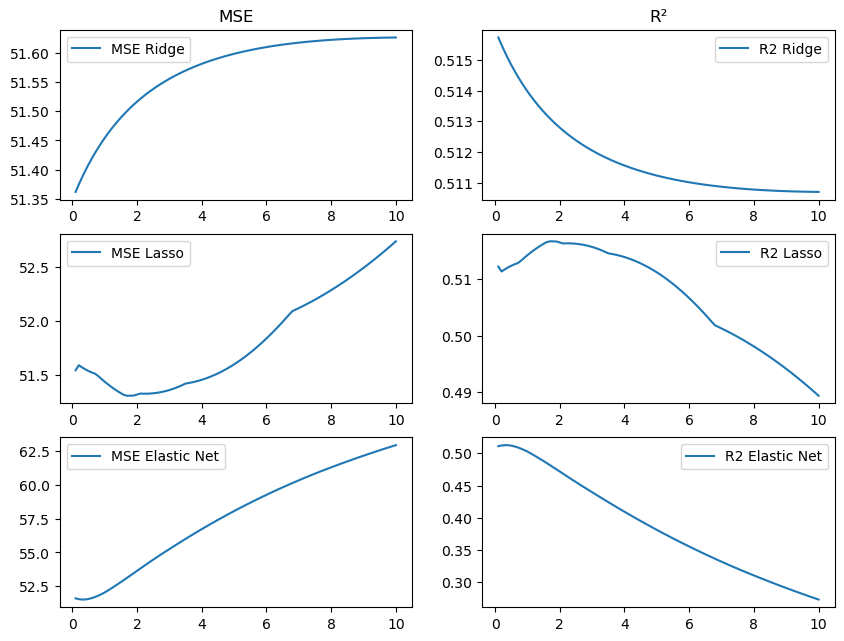

In [78]:
# coeficientes de regularización
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 7.5))

axs[0,0].set_title("MSE")
axs[0,1].set_title("R²")

axs[0,0].plot(alphas, result_mse_ridge, label="MSE Ridge")
axs[0,1].plot(alphas, result_r2_ridge,label="R2 Ridge")
axs[0,0].legend()
axs[0,1].legend()


axs[1,0].plot(alphas, result_mse_lasso, label="MSE Lasso")
axs[1,1].plot(alphas, result_r2_lasso, label="R2 Lasso")
axs[1,0].legend()
axs[1,1].legend()

axs[2,0].plot(alphas, result_mse_EN, label="MSE Elastic Net")
axs[2,1].plot(alphas, result_r2_EN, label="R2 Elastic Net")
axs[2,0].legend()
axs[2,1].legend()

plt.show()

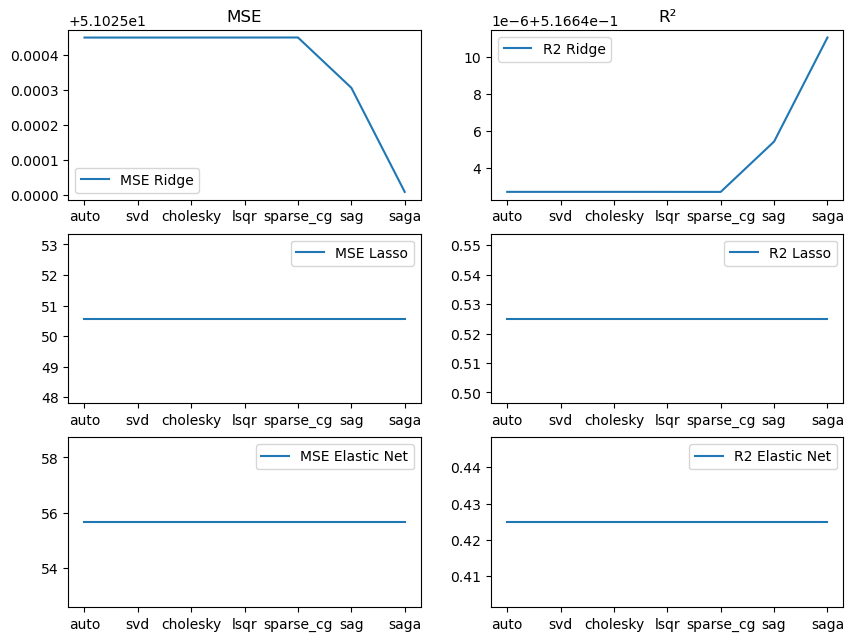

In [17]:
# coeficientes de regularización
fig2, axs2 = plt.subplots(nrows=3, ncols=2, figsize=(10, 7.5))

axs2[0,0].set_title("MSE")
axs2[0,1].set_title("R²")

axs2[0,0].plot(solvers, result_solvers_mse_ridge, label="MSE Ridge")
axs2[0,1].plot(solvers, result_solvers_r2_ridge,label="R2 Ridge")
axs2[0,0].legend()
axs2[0,1].legend()


axs2[1,0].plot(solvers, result_solvers_mse_lasso, label="MSE Lasso")
axs2[1,1].plot(solvers, result_solvers_r2_lasso, label="R2 Lasso")
axs2[1,0].legend()
axs2[1,1].legend()

axs2[2,0].plot(solvers, result_solvers_mse_EN, label="MSE Elastic Net")
axs2[2,1].plot(solvers, result_solvers_r2_EN, label="R2 Elastic Net")
axs2[2,0].legend()
axs2[2,1].legend()

plt.show()

#### Analiza los resultados obtenidos y determina cuál modelo y configuración de hiperparámetros ofrece el mejor rendimiento

Según los resultados anteriormente obtenidos, los mejores modelos son el de regresión lineal de Ridge y de Lasso, ya que tienen unos resultados de MSE y R² parecidos.

En cuanto a los hiperparámetros, se ha probado cambiar el coeficiente regularización, el cuál afecta muy notablemente el rendimiento de los modelos de regresión lineal. A mayor coeficiente de regularización, peores resultados se obtienen, ya que el MSE es mayor y el R² es menor. Por ello, lo ideal es utilizar un coeficiente regularización entre 2 y 4 aproximadamente en este caso, aunque para cadad dataset será un caso diferente, y habrá que realizar el mismo proceso de búsqueda de la mejor configuración.

Por otro lado, también se ha experimentado con el hiperparámetro $solver$, el cuál se ocupa de decidir como la rutina computacional que se utiliza para calcular la regresión lineal. En este caso, lo más recomendado es dejar la opción que viene predeterminada, $auto$, que como su nombre indica, elige automáticamente el mejor $solver$.

#### Concluye sobre las características de cada modelo y cómo influyen en el ajuste a los datos

Los tres modelos son muy parecidos entre sí, ya que los resultados no se alejan mucho, ajustan los datos de manera parecida. Lo que sí que se puede confirmar, es que los modelos de Ridge y de Lasso son algo mejores que el Elastic Net, así que habría que elegir entre los dos primeros. 

Para poder elegir, el mejor proceso sería realizar pruebas con el dataset deseado, para poder ver que modelo obtiene mejores resultados.

### Pregunta 6

##### Entrenar un modelo de SVM con kernel no lineal, con un dataset de scikit-learn (para clasificación binaria, como el breast_cancer) y evaluar la influencia de sus parámetros

- Importa svm para el modelo SVM
- Elige un dataset proporcionado por Scikit-Learn adecuado para clasificación binaria
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split
- Configura el modelo SVM seleccionando un kernel no lineal, como 'rbf', 'poly', o 'sigmoid'
- Asegúrate de entender las implicaciones de cada tipo de kernel y cómo pueden afectar el modelo
- Varía los parámetros importantes del kernel elegido, como C (parámetro de regularización), gamma (parámetro del kernel), y otros parámetros específicos del kernel como el grado en el caso del kernel polinómico.
- Entrena múltiples modelos con diferentes combinaciones de estos parámetros
- Utiliza una métrica de evaluación adecuada para evaluar el modelo en el conjunto de prueba, como la precisión, el área bajo la curva ROC, etc...
- Compara cómo diferentes valores de parámetros afectan el rendimiento del modelo
- Reflexiona sobre cómo la selección y ajuste de parámetros pueden mejorar o empeorar el modelo

#### Importa svm para el modelo SVM

In [2]:
from sklearn.svm import SVC

#### Elige un dataset proporcionado por Scikit-Learn adecuado para clasificación binaria

In [3]:
bc = datasets.load_breast_cancer()
bc_df = pd.DataFrame(bc.data, columns = bc.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
normaliser = StandardScaler() # Crear normalizador
bc_norm = normaliser.fit_transform(bc.data) # Normalizar datos

In [5]:
data = bc_norm
target = bc.target

#### Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

####  Configura el modelo SVM seleccionando un kernel no lineal, como 'rbf', 'poly', o 'sigmoid'. 
#### Asegúrate de entender las implicaciones de cada tipo de kernel y cómo pueden afectar el modelo

- El kernel RBF es una función radial que se suele utilizar por defecto en los modelos SVM. Tiene buen rendimiento en muchos casos, por ello se suele usar como opción predeterminada

- El kernel Poly es una función polinomial. Es un kernel más complejo que el RBF, por lo que requiere mayor tiempo de procesado. Es eficiente cuando los $features$ están relacionados polinómicamente.

- El kernel sigmoid es una función sigmoidal. Es sensible cuando se escalan los datos.

Para este ejercicio, se va a probar el kernel RBF, ya que es el más común. A continuación se van a crear distintos modelos, con distintos parámetros, para observar como afectan al rendimiento.


#### Varía los parámetros importantes del kernel elegido, como C (parámetro de regularización), gamma (parámetro del kernel), y otros parámetros específicos del kernel como el grado en el caso del kernel polinómico.

#### Entrena múltiples modelos con diferentes combinaciones de estos parámetros

Como se usa el kerner $RBF$, se van a probar los siguientes parámetros:

- C: Controla la penalización del error de entrenamiento. A mayor valor de C, más se penaliza el error de entrenamiento, lo que ayuda a reducir el $overfitting$, pero reduce la capacidad de generalización del modelo.

- Gamma: Controla la función de decisión, es decir, afecta la forma en la que se realizan los límites de decisión del modelo. A menor gamma, los límites de decision son menos ajustados, se ajustan menos a los datos de entrenamiento, pero esto puede dar "underfitting".

- Shrinking: Este parámetro decide si se usa la heurística de encogimiento o no. Es útil en conjuntos de datos grandes para reducir el tiempo de entrenamiento.

- Probability: Activa o desactiva las estimaciones de probabilidad. Si está activo, puede ralentizar el entrenamiento.

Para encontrar el mejor modelo con ciertos parámetros, se va a utilizar el paquete $GridSearchCV$, que permite introducir múltiples parámetros en una sola línea de código para entrenar múltiples modelos de una tirada:

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
params = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 10, 20],
    'gamma': ["scale", "auto", 0.01, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'shrinking': [True, False],
    'probability': [True, False]
}

svm_model = SVC(kernel='rbf')
grid_search_svm = GridSearchCV(svm_model, params, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 10, 20],
                         'gamma': ['scale', 'auto', 0.01, 1, 2, 3, 4, 5, 6, 7,
                                   8, 9, 10],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             scoring='accuracy')

#### Utiliza una métrica de evaluación adecuada para evaluar el modelo en el conjunto de prueba, como la precisión, el área bajo la curva ROC, etc...

Para evaluar el modelo creado, se va a utilizar como métrica la precisión. Para ello, primero se van a predecir los resultados usando la función $predict$ sobre el modelo SVM con los datos de test, y después se usará la función $accuracy$_ $score$, que dará la precisión del modelo:

In [12]:
print("Mejores parámetros:", grid_search_svm.best_params_)

y_pred = grid_search_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo en el conjunto de prueba:", accuracy)

Mejores parámetros: {'C': 10, 'gamma': 'auto', 'probability': True, 'shrinking': True}
Exactitud del modelo en el conjunto de prueba: 0.951048951048951


El modelo con mejores parámetros ha conseguido una precisión del 95.1%. Para comprobar como afectan los demás parámetros, se van a cambiar a continuación:

In [42]:
svm_model2 = SVC(kernel='rbf', C = 10, gamma = 0.1, shrinking = True, probability = False)
svm_model2.fit(X_train, y_train)

y_pred2 = svm_model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Exactitud del modelo en el conjunto de prueba:", accuracy2)

Exactitud del modelo en el conjunto de prueba: 0.9300699300699301


In [45]:
# Cambio del parámetro C, shrinking y probability

svm_model3 = SVC(kernel='rbf', C = 0.01, gamma = 1, shrinking = False, probability = True)
svm_model3.fit(X_train, y_train)

y_pred3 = svm_model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Exactitud del modelo en el conjunto de prueba:", accuracy3)

svm_model3 = SVC(kernel='rbf', C = 0.1, gamma = 1, shrinking = True, probability = True)
svm_model3.fit(X_train, y_train)

y_pred3 = svm_model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Exactitud del modelo en el conjunto de prueba:", accuracy3)

svm_model3 = SVC(kernel='rbf', C = 0.5, gamma = 1, shrinking = True, probability = True)
svm_model3.fit(X_train, y_train)

y_pred3 = svm_model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Exactitud del modelo en el conjunto de prueba:", accuracy3)

svm_model3 = SVC(kernel='rbf', C = 1, gamma = 1, shrinking = False, probability = False)
svm_model3.fit(X_train, y_train)

y_pred3 = svm_model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Exactitud del modelo en el conjunto de prueba:", accuracy3)

Exactitud del modelo en el conjunto de prueba: 0.5944055944055944
Exactitud del modelo en el conjunto de prueba: 0.5944055944055944
Exactitud del modelo en el conjunto de prueba: 0.5944055944055944
Exactitud del modelo en el conjunto de prueba: 0.5944055944055944


In [44]:
# Cambio del parámetro gamma, shrinking y probability

svm_model4 = SVC(kernel='rbf', C = 10, gamma = 0.05, shrinking = False, probability = False)
svm_model4.fit(X_train, y_train)

y_pred4 = svm_model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Exactitud del modelo en el conjunto de prueba:", accuracy4)

svm_model4 = SVC(kernel='rbf', C = 10, gamma = 0.1, shrinking = True, probability = False)
svm_model4.fit(X_train, y_train)

y_pred4 = svm_model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Exactitud del modelo en el conjunto de prueba:", accuracy4)

svm_model4 = SVC(kernel='rbf', C = 10, gamma = 0.5, shrinking = True, probability = True)
svm_model4.fit(X_train, y_train)

y_pred4 = svm_model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Exactitud del modelo en el conjunto de prueba:", accuracy4)

svm_model4 = SVC(kernel='rbf', C = 10, gamma = 1, shrinking = False, probability = False)
svm_model4.fit(X_train, y_train)

y_pred4 = svm_model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Exactitud del modelo en el conjunto de prueba:", accuracy4)

Exactitud del modelo en el conjunto de prueba: 0.951048951048951
Exactitud del modelo en el conjunto de prueba: 0.9300699300699301
Exactitud del modelo en el conjunto de prueba: 0.7272727272727273
Exactitud del modelo en el conjunto de prueba: 0.6013986013986014


#### Compara cómo diferentes valores de parámetros afectan el rendimiento del modelo

Como se puede comprobar en los ejemplos anteriores, el parámetro que más afecta al modelo SVM, para este dataset, es el parámetro $gamma$.

A menor $gamma$, mejor precisión tiene el modelo. De hecho, en el primer modelo del output anterior, se ha encontrado el gamma concreto que ha utilizado el supuesto mejor modelo del $GridSerach$, 0.05.

Por las pruebas realizadas, los demás parámetros no cambian el rendimiento del modelo con este dataset, ya que se han hecho pruebas cambiando los parámetros $C$, $shrinking$ y $probability$, y no se han encontrado resultados que digan que afectan a la precisión del modelo.

#### Reflexiona sobre cómo la selección y ajuste de parámetros pueden mejorar o empeorar el modelo

Como se ha dicho en el apartado anterior, se ha llegado a la clara conclusión que, para este caso, el parámetro clave para obtener mejores o peores resultados es modificar el parámetro gamma.

A menor gamma, mayor precisión se obtiene al predecir datos. Pero no se puede utilizar simplemente un gamma bajo, ya que esto puede provocar underfitting, debido a que un gamma bajo hace que los límites de decisión sean menos ajustados al conjunto de entrenamiento. Hay que encontrar un punto medio que haga que el modelo sea capaz de sacar buenos resultados tanto con el conjunto de train como de test.

### Pregunta 7

##### Realización de estrategias diferentes de Cross-Validation sobre un conjunto de datos y evaluar los resultados

- Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para el tipo de análisis que vas a realizar
- Si es necesario, realiza preprocesamientos como la **normalización** o la codificación de variables categóricas
- Elige un modelo de aprendizaje automático de Scikit-Learn adecuado para tu dataset entre los vistos en clase hasta ahora
- Selecciona al menos dos estrategias de validación cruzada para comparar. Por ejemplo, podrías elegir la validación cruzada K-Fold estándar (que la puedes configurar directamente con un número en el método cross_val_score), la validación cruzada estratificada (Stratified K-Fold) o la Repeated Stratified K-Fold
- Utiliza las funciones de Scikit-Learn para aplicar cada estrategia de validación cruzada al modelo y al conjunto de datos
- Registra los resultados de rendimiento que establezcas para cada iteración de la validación cruzada
- Analiza los resultados obtenidos de cada estrategia de validación cruzada
- Compara las métricas de rendimiento que establezcas, entre las diferentes estrategias, para ver cuál de los Cross-Validation ofrece una evaluación más robusta o resultados más consistentes (evaluar dispersión de los resultados para las repeticiones de cada fold)
- Reflexiona sobre cómo la elección de la estrategia de validación cruzada puede influir en la interpretación de la capacidad predictiva del modelo

#### Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para el tipo de análisis que vas a realizar

Se va a utilizar el dataset $wine$ proporciondo por Scikit-Learn para crear un modelo de clasificación KNN: 

In [3]:
wine = datasets.load_wine()
# Se visualiza el contenido del dataset
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### Si es necesario, realiza preprocesamientos como la normalización o la codificación de variables categóricas

In [4]:
# Comprobar si hay nulos
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
# Normalizar los datos de la tabla
scaler = StandardScaler()
wine_data_norm = scaler.fit_transform(wine.data)

In [6]:
# Visualizar el efecto de la normalizacion
norm = pd.DataFrame(wine_data_norm, columns=wine.feature_names)
norm.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [7]:
# Separar en train test
X_train, X_test, y_train, y_test = train_test_split(wine_data_norm, wine.target, stratify = wine.target)

#### Elige un modelo de aprendizaje automático de Scikit-Learn adecuado para tu dataset entre los vistos en clase hasta ahora

In [8]:
knn = KNeighborsClassifier(n_neighbors=7)

#### Selecciona al menos dos estrategias de validación cruzada para comparar. Por ejemplo, podrías elegir la validación cruzada K-Fold estándar (que la puedes configurar directamente con un número en el método cross_val_score), la validación cruzada estratificada (Stratified K-Fold) o la Repeated Stratified K-Fold

Para este ejercicio se va a utilizar:

- K-Fold estándar: Divide el conjunto de datos en k pliegues, y en cada iteración utiliza cierta cantidad de pliegues para entrenar el modelo y el resto para probarlo y evaluar el rendimiento del mismo.

- Stratified K-Fold: Divide el conjunto de datos en k pliegues como el caso anterior, pero en este caso se garantiza que la proporción de tipos de dato en cada fold sea similar a la proporción original del dataset.

En los siguientes outputs se van a construir los objetos que contienen ambas estrategias de validación cruzada:

In [9]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [10]:
# Kfold standar
kfold = KFold(n_splits=10)

In [11]:
# Stratified Kfold
skfold = StratifiedKFold(n_splits=10)

#### Utiliza las funciones de Scikit-Learn para aplicar cada estrategia de validación cruzada al modelo y al conjunto de datos

La función que hay que utilizar para aplicar cada estrategia de validación cruzada al modelo y al conjunto de datos es $cross$_ $val$_ $score$, y se utiliza de la siguiente forma:

In [12]:
# Kfold standar
score_kfold = cross_val_score(knn, wine_data_norm, wine.target, cv=kfold)

In [13]:
# Stratified Kfold
score_skfold = cross_val_score(knn, wine_data_norm, wine.target, cv=skfold)

#### Registra los resultados de rendimiento que establezcas para cada iteración de la validación cruzada

Para evaluar el rendimiento de las dos estrategias de validación cruzada, se va a utilizar la medida de la precisión, que se consigue utilizando el método de $cross$ _$val$ _$score$ utilizado en el apartado anterior.

In [14]:
# Kfold standar
print("Precisión:", score_kfold, '\n')
print("Precisión media:", np.mean(score_kfold))

Precisión: [1.         1.         0.94444444 0.83333333 0.88888889 0.88888889
 0.94444444 0.94444444 1.         1.        ] 

Precisión media: 0.9444444444444444


In [15]:
# Stratified Kfold
print("Precisión:", score_skfold, '\n')
print("Precisión media:", np.mean(score_skfold))

Precisión: [1.         0.94444444 0.94444444 0.94444444 1.         0.88888889
 1.         1.         0.94117647 1.        ] 

Precisión media: 0.9663398692810456


#### Analiza los resultados obtenidos de cada estrategia de validación cruzada

El $Kfold$ estándar ha obtenido una media de precisión de 94.44%, donde 4 pliegues han conseguido un 100% de precisión, y los demás rondan entre el 83.33% al 94.44% de precisión.

Por otro lado, el $Stratified$ $Kfold$ ha obtenido una media de precisión de 96.63%, donde 5 pliegues de los 10 han obtenido un 100% de precisión. Los demás pliegues rondan entre el 88.89% al 94.44%.

Pero lo importante es que resultados obtiene cada estrategia por pliegue, ya que de esta manera se podrá saber que combinación es la óptima para entrenar el modelo con este dataset. 

Para el $Kfold$ estándar, los mejores pliegues son el 1, 2, 9 y 10.
Para el $Stratified$ $Kfold$ , los mejores pliegues son el 1, 5, 7, 8 y 10.

Se eligen estos pliegues debido a que todos han obtenido un 100% de precisión tras las pruebas realizadas. Estos $fold$ serían los que se deben de utilizar para entrenar el modelo, debido a que son, en este caso, clasificar correctamente los tipos de vino.

#### Compara las métricas de rendimiento que establezcas, entre las diferentes estrategias, para ver cuál de los Cross-Validation ofrece una evaluación más robusta o resultados más consistentes (evaluar dispersión de los resultados para las repeticiones de cada fold)

Tras el análisis anterior, usando la precisión como medida de evaluación, el $Stratified$ $Kfold$ es el la opción con resultados más consistentes.

Para terminar de confirmar esta hipótesis, se va a evaluar la dispersión de los resultados para las repeticiones de cada fold calculando la varianza y la desviación estándar de cada estrategia:

In [16]:
print("Varianza K-Fold estándar: ",score_kfold.var())
print("Desviación estándar K-Fold estándar: ",score_kfold.std())

Varianza K-Fold estándar:  0.0030864197530864204
Desviación estándar K-Fold estándar:  0.05555555555555556


In [18]:
print("Varianza Stratified K-Fold: ",score_skfold.var())
print("Desviación estándar Stratified K-Fold: ",score_skfold.std())

Varianza Stratified K-Fold:  0.0013735101883890822
Desviación estándar Stratified K-Fold:  0.037060898375364325


Como se puede comprobar, se puede observar que se obtiene menor varianza y desviación estándar con el $Stratified$ $Kfold$, afirmando entonces que esta estrategia es la mejor para este ejercicio.

#### Reflexiona sobre cómo la elección de la estrategia de validación cruzada puede influir en la interpretación de la capacidad predictiva del modelo

La elección de la estrategia de validación cruzada es crucial, ya que los resultados pueden ser muy diferentes entre estrategias. 

En este ejercicio, se ha visto como el $Stratified$ $Kfold$ ha dado unos resultados ligeramente superiores. Es cierto que puede parecer una diferencia muy pequeña, pero esta diferencia puede suponer algo importante dentro de un caso de negocio o de investigación.

La estrategia de validación cruzada es crucial, ya que influye de manera importante en el rendimiento de un modelo.

### Pregunta 8

##### Buscar parámetros óptimos con GridSearchCV entrenando modelos SVM

- Importa las librerías y módulos necesarios de Python y Scikit-Learn, incluyendo el módulo svm para el modelo SVM y model_selection para GridSearchCV
- Elige y carga un dataset de Scikit-Learn adecuado para trabajar con un modelo SVM
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split
- Crea una instancia del modelo SVM que deseas optimizar
- Establece un diccionario de parámetros para probar con GridSearch. Incluye parámetros como C, kernel, gamma y otros relevantes para el modelo SVM
- Configura GridSearchCV con el modelo SVM, el diccionario de parámetros, y cualquier otra configuración relevante como la métrica de evaluación y el número de folds para la validación cruzada
- Entrena GridSearchCV con el conjunto de entrenamiento para buscar los mejores parámetros
- Una vez que GridSearchCV haya encontrado la mejor combinación de parámetros, evalúa este modelo óptimo en el conjunto de prueba
- Utiliza métricas de rendimiento adecuadas, como la precisión o el área bajo la curva ROC, para evaluar su desempeño
- Revisa los parámetros que GridSearchCV ha identificado como óptimos

#### Importa las librerías y módulos necesarios de Python y Scikit-Learn, incluyendo el módulo svm para el modelo SVM y model_selection para GridSearchCV

El primer paso es impotar las librerías necesarias, tanto para crear el modelo SVM, como para hacer el GridSearch:

In [2]:
from sklearn import svm, model_selection
from sklearn.model_selection import GridSearchCV

#### Elige y carga un dataset de Scikit-Learn adecuado para trabajar con un modelo SVM

El dataset elegido para este ejercio es el de iris:

In [3]:
iris = datasets.load_iris()

#### Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify = iris.target)

#### Crea una instancia del modelo SVM que deseas optimizar

In [5]:
svm_model = svm.SVC()

#### Establece un diccionario de parámetros para probar con GridSearch. Incluye parámetros como C, kernel, gamma y otros relevantes para el modelo SVM

En la siguiente celda, se va a crear un diccionario con todos los parámetros del modelo SVM, y se van a introducir diferentes opciones en todos ellos:



In [6]:
parametros = {
    'C': [0.1, 0.5, 1, 10, 50, 100],                   
    'kernel': ['linear', 'rbf', 'poly'],     
    'gamma': [0.01, 0.1, 1, 10, 100, 'scale', 'auto'], 
    'degree': [1, 2, 3, 4, 5],                      
    'coef0': [0, 1],                          
    'shrinking': [True, False],               
    'probability': [True, False],            
    'tol': [0.1, 0.01, 0.001]                 
} 

#### Configura GridSearchCV con el modelo SVM, el diccionario de parámetros, y cualquier otra configuración relevante como la métrica de evaluación y el número de folds para la validación cruzada

Para configurar GridSearchCV, hay que utilizar la función $GridSearchCV$. Este método crea un objeto que contiene el GridSearchCV con los parámetros que se le introduzca. Habría que introducir el modelo SVM creado anteriormente, el grid de parámetros y que medida de evaluación se va a utilizar,. en este caso, la precisión:

In [7]:
grid_search = GridSearchCV(svm_model, parametros, scoring='accuracy')

#### Entrena GridSearchCV con el conjunto de entrenamiento para buscar los mejores parámetros

Para entrenar el modelo, se tiene que usar el método $fit$ sobre el objeto creado con GridSearchCV. Se le pasará como parámetros el conjunto de $train$:

In [8]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 10, 50, 100], 'coef0': [0, 1],
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': [0.01, 0.1, 1, 10, 100, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'probability': [True, False],
                         'shrinking': [True, False],
                         'tol': [0.1, 0.01, 0.001]},
             scoring='accuracy')

#### Una vez que GridSearchCV haya encontrado la mejor combinación de parámetros, evalúa este modelo óptimo en el conjunto de prueba

#### Utiliza métricas de rendimiento adecuadas, como la precisión o el área bajo la curva ROC, para evaluar su desempeño

Para obtener la mejor combinación de parámetros, y la precisión conseguida, se tienen que utilizar las siguientes funciones:

In [14]:
# Obtener la mejor combinación de parámetros
best_params = grid_search.best_params_

# Obtener la precisión de la mejor combinación de parámetros
best_score = grid_search.best_score_

# Print de los resultados
print("Mejor combinación de parámetros:", '\n', best_params, '\n')
print("Precisión de la mejor combinación de parámetros:", best_score, '\n')

Mejor combinación de parámetros: 
 {'C': 100, 'coef0': 0, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True, 'shrinking': True, 'tol': 0.1} 

Precisión de la mejor combinación de parámetros: 0.9913043478260869 



Ahora se va a probar el modelo sobre el conjunto de prueba. Para ello, se va a predecir los resultados usando el objeto que se ha entrenado anteriormente $grid$_ $search$:

In [17]:
predicts = grid_search.predict(X_test)

Ahora con este resultado, se puede calcular la precisión obtenida en el conjunto de test usando el método $accuracy$_ $score$ de la siguiente forma:

In [18]:
precission = accuracy_score(y_test, predicts)
print('Precisión en el conjunto de prueba: ', precission)

Precisión en el conjunto de prueba:  0.9736842105263158


Según esta prueba, el modelo ha acertado un 97.36% de veces, resultado no muy alejado del obtenido con el conjunto de entrenamiento, por lo que el modelo funciona muy bien, aunque tal vez haya formas de poder optimizarlo mas.

#### Revisa los parámetros que GridSearchCV ha identificado como óptimos

Los parámetros óptimos encontrados por el método $GridSearchCV$ son:
    
- C (Regularización de la penalización) = 100
- Coef0 (Término independiente en las funciones 'poly' y 'sigmoid') = 0
- Degree (Grado del polinomio en el kernel 'poly') = 1
- Gamma (Controla los límites de decisión) = 0.01
- Kernel = rbf
- Probability (Indica si se habilitan las estimaciones de probabilidad) = True
- Shrinking (Indica si se utiliza el encogimiento) = True
- Tol (Tolerancia para la convergencia del algoritmo de optimización) = 0.1

### Pregunta 9

##### Evaluación de Distintas Métricas en un Modelo de Clasificación Multiclase con Scikit-Learn

- Elige y carga un dataset de Scikit-Learn que sea adecuado para una tarea de clasificación multiclase (o incluso el de las frutas de las primeras clases)
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split
- Utiliza un modelo KNN para clasificación
- Entrena el modelo utilizando el conjunto de datos de entrenamiento
- Utiliza distintas métricas de evaluación de clasificación adecuadas para clasificación multiclase, como la precisión, la sensibilidad (recall), la puntuación F1, la matriz de confusión, y el área bajo la curva ROC (AUC) para cada clase
- Aplica estas métricas al modelo utilizando el conjunto de datos de prueba
- Examina los resultados obtenidos para cada métrica
- Considera la importancia de cada métrica en el contexto de tu problema específico de clasificación multiclase
- Basándote en las métricas evaluadas, concluye sobre el rendimiento general del modelo en la tarea de clasificación multiclase

#### Elige y carga un dataset de Scikit-Learn que sea adecuado para una tarea de clasificación multiclase (o incluso el de las frutas de las primeras clases)

Para este ejercicio se ha elegido el dataset iris, que contienen 3 tipos de flor, lo que hace posible crear un modelo de predicción multiclase a partir de este dataset

In [2]:
iris = datasets.load_iris() 

In [3]:
# Visualización de las clases
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify = iris.target)

#### Utiliza un modelo KNN para clasificación

In [5]:
knn_iris = KNeighborsClassifier(n_neighbors=5)

#### Entrena el modelo utilizando el conjunto de datos de entrenamiento

In [6]:
knn_iris.fit(X_train, y_train) 

KNeighborsClassifier()

#### Utiliza distintas métricas de evaluación de clasificación adecuadas para clasificación multiclase, como la precisión, la sensibilidad (recall), la puntuación F1, la matriz de confusión, y el área bajo la curva ROC (AUC) para cada clase

#### Aplica estas métricas al modelo utilizando el conjunto de datos de prueba

Se van a utilizar todas las métricas mencionadas por el enunciado. Lo primero que hay que hacer, sería importar el paquete $metrics$, que incluye todas estas métricas:

In [8]:
from sklearn import metrics

Después habrá que predecir tanto resultados, como probabilidades del modelo usando los métodos $predict$ y $predict$_ $proba$ sobre el modelo entrenado usando el conjunto de test:

In [29]:
y_pred = knn_iris.predict(X_test) # Predicción del modelo usando el conjunto de test
y_prob = knn_iris.predict_proba(X_test)# Probabilidades del modelo usando el conjunto de test

Ahora ya se pueden calcular las diferentes métricas, comenzando por la precisión. Para ello, se utilizará el mismo método dos veces, la primera vez para calcular la precisión media de todas las clases, y después la precisión por cada clase. Esto se consigue cambiando el parámetro $average$ a None de este método $precision$_ $score$ como se ve en la siguiente celda:

In [30]:
# Precisión
precision = metrics.precision_score(y_test, y_pred, average='macro')
precision_class = metrics.precision_score(y_test, y_pred, average=None)

Para la sensibilidad y puntuación F1 se va a realizar el mismo proceso, ya que los métodos $recall$_ $score$ y $f1$_ $score$ también aceptan el cambio de parámetro de average a none, que permite saber los resultados de cada métrica por clase:

In [31]:
# Sensibilidad
recall = metrics.recall_score(y_test, y_pred, average='macro')
recall_class = metrics.recall_score(y_test, y_pred, average=None)

In [32]:
# Puntuación F1
f1 = metrics.f1_score(y_test, y_pred, average='macro')
f1_class = metrics.f1_score(y_test, y_pred, average=None)

Para construir la matriz de construcción se tiene que utilizar el método $confusion$_ $matrix$, como se ve en la siguiente celda:

In [12]:
# Matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

Por último, para calcular el AUC por cada clase, hay que crear un bucle, ya que no existe ninguna función que lo haga automáticamente.

La siguiente celda realiza los siguientes pasos: 
- Calcular el número de clases que contiene el dataset
- Crear una lista donde se almacenarán, en este caso, el AUC de las 3 clases
- Se crea un bucle que irá clase a clase calculando el AUC
- El primer paso del bucle es obtener una lista que contiene valores 0 y 1, donde 1 indica que el dato es de la clase de la que se está calculando el AUC
- Después se obtienen las probabilidades de estos valores de la clase, necesarias para el calculo del AUC
- Ahora se calcula el AUC con el método $roc$_ $auc$_ $score$ 
- Por último, se incluye este resultado a la lista creada anteriormente

In [23]:
# AUC para cada clase
n_classes = len(np.unique(y_train)) # Se saca el número de clases del dataset
auc_scores = [] # Lista donde se almacena los AUC

for i in range(n_classes): # Bucle que calcula el AUC para cada clase
    y_class = (y_test == i).astype(int) # Esta linea decide si cada valor es de la clase de la que se esta calculando el AUC
    y_prob_i = y_prob[:, i] # Probabilidades predichas por el modelo por cada clase
    auc_i = metrics.roc_auc_score(y_class, y_prob_i) # Calculo del área bajo la curva ROC (AUC)
    auc_scores.append(auc_i) # Se incluye el AUC a la lista de resultados

#### Examina los resultados obtenidos para cada métrica

Ahora ya con todas las métricas calculadas, se puede proceder a sacar conclusiones sobre las mismas:

In [34]:
print("Media precisión:", precision, '\n')
print("Precisión por clase:", precision_class, '\n')

Media precisión: 0.9487179487179488 

Precisión por clase: [1.         0.92307692 0.92307692] 



In [33]:
print("Media sensibilidad:", recall, '\n')
print("Sensibilidad por clase:", recall_class, '\n')

Media sensibilidad: 0.9487179487179488 

Sensibilidad por clase: [1.         0.92307692 0.92307692] 



In [35]:
print("Puntuación media F1:", f1, '\n')
print("Puntuación F1 por clase:", f1_class, '\n')

Puntuación media F1: 0.9487179487179488 

Puntuación F1 por clase: [1.         0.92307692 0.92307692] 



La conclusión de la precisión, sensibilidad y score F1 es la misma, ya que se ha obtenido el mejor resultado, media de 94.87%, donde la primera clase tiene un 100% en las 3 métricas, y las otras dos clases un 92.3%.

Esto quiere decir que el modelo es capaz de predecir a la perfección la primera clase, pero en las otras dos falla más. No es un fallo muy grande, pero dependiendo del contexto puede ser significativo.

In [17]:
print("Matriz de confusión:","\n", confusion_matrix,"\n")

Matriz de confusión: 
 [[12  0  0]
 [ 0 12  1]
 [ 0  1 12]] 



Con la matriz de confusión se puede observar donde se ha fallado, y como se sabía de antes, se ha obtenido fallos en la clase 1 y la clase 2, donde el modelo ha identificado 1 vez un clase 1 como clase 2, y un clase 2 como un clase 1.

In [18]:
print('AUC Clase 0: ', auc_scores[0],'\n')
print('AUC Clase 1: ', auc_scores[1],'\n')
print('AUC Clase 2: ', auc_scores[2])

AUC Clase 0:  1.0 

AUC Clase 1:  0.9738461538461538 

AUC Clase 2:  0.9553846153846155


Por último, el AUC sigue la dinámica anterior, la clase 0 es la que mejor resultado tiene. En este caso, la clase 1 obtiene unos resultados ligeramente superiores a los de la clase 2, aunque es una diferencia pequeña.

#### Considera la importancia de cada métrica en el contexto de tu problema específico de clasificación multiclase

- Precisión: Esta métrica mide la cantidad de veces que el modelo ha predicho correctamente, en este caso, la clase de vino. Esta métrica es importante ya que nos indica si el modelo tiene una buena o mala capacidad predictiva.

- Sensibilidad: La sensibilidad mide la proporción de verdaderos positivos identificados correctamente por el modelo. Se diferencia con la precisión en que esta se calcula dividiendo los verdaderos positivos entre la suma de verdaderos positivos y falsos positivos, mientras que la sensibilidad se calcula dividiendo los verdaderos positivos, entre la suma de verdaderos positivos y falsos negativos.

- Puntuación F1: Es la media entre precisión y sensibilidad. Es una forma de visualizar rápidamente el resultado de las dos métricas sin tener que profundizar en cada una. En el caso de la clasificación de vinos, creo que es la métrica más eficiente, ya que se quiere tener un equilibrio entre precisión y sensibilidad.

- Matriz de confusión: Permite visualizar gráficamente los aciertos y los errores de cada clase. La importancia de esta métrica, es que se puede visualizar concretamente dónde el modelo está fallando, que clases está confundiendo con otras, para posteriormente poder realizar ajustes y mejorar el modelo.

- AUC: El área bajo la Curva ROC evalua la capacidad que tiene el modelo diferenciando clases. Cuanto más alto sea el AUC, mejor rendimiento tiene el modelo clasificando los vinos.

#### Basándote en las métricas evaluadas, concluye sobre el rendimiento general del modelo en la tarea de clasificación multiclase

El rendimiento del modelo es muy bueno, ya que este es capaz de clasificar los tipos de vino de una forma muy correcta, fallando solo 2 veces con el conjunto de test.

Esto deja un margen de mejora, ya que siempre se pueden analizar las métricas calculadas para poder realizar cambios en el modelo, pero se puede concluir en que el modelo es fiable y útil, pero mejorable.